In [1]:
import uproot as uproot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
import sys
import h5py

In [2]:
sys.path.append("/home/surajrai1900/IWCD_ParticleGun-analysis")

In [3]:
import create_file
import utils

In [4]:
df = create_file.relevant_df()

/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in true_divide
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in true_divide
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:37: RuntimeWarning: invalid value encountered in sqrt
  towall_barrel = (-b + np.sqrt(b ** 2 - a * c)) / a
/home/surajrai1900/IWCD_ParticleGun-analysis/Watchmal_dependencies/math.py:3

In [5]:
df

,pgamma,pe,pmu,ppi0,h5_labels,h5_momentum,h5_towall,h5_dwall,e/mu_likelihood ratio,pi0/e_likelihood ratio,reco_electron_mom,reco_electron_dwall,reco_electron_towall,pi0_mass,true_sig
0,6.805751e-01,2.425326e-01,5.177643e-06,0.076887,0,245.777585,190.761574,64.608521,114.199707,54.480957,250.916840,57.913010,191.407663,9.491168,0
1,7.944071e-01,1.203437e-01,5.890467e-07,0.085249,0,858.386823,158.604782,99.009644,1074.375977,78.951660,797.857849,119.633789,180.764429,118.400070,0
2,6.901310e-01,4.059530e-02,5.872762e-08,0.269274,0,984.556023,41.012970,30.859924,74.315430,324.837402,150.115875,-37.203552,662.625427,21.504663,0
3,2.611938e-01,7.083367e-01,6.118560e-07,0.030469,0,818.989202,417.253355,121.900787,946.374023,110.063477,878.783569,116.365997,424.645895,6.629326,0
4,6.674357e-01,1.820178e-01,5.356713e-05,0.150493,0,60.207409,78.351025,74.096588,76.118286,24.191650,61.221466,81.450684,81.715966,10.604737,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671515,4.895870e-01,1.703820e-01,1.041590e-07,0.340031,3,1129.409646,700.627380,1.895538,878.447266,66.927734,775.435730,94.645874,692.367065,50.799816,0
4671516,4.543071e-01,3.465165e-01,2.957127e-06,0.199173,3,762.779145,261.614868,60.631088,121.249512,347.689941,364.943909,56.375961,289.517944,22.597305,0
4671517,1.825165e-03,7.390963e-04,1.395301e-09,0.997436,3,570.130133,141.040481,23.028564,327.521484,406.167969,582.555054,46.259186,190.915211,66.667923,0
4671518,4.834746e-01,4.964638e-01,7.220223e-08,0.020062,3,424.911380,368.044983,125.783417,335.249512,-5.601074,367.815887,124.889160,354.853577,9.226375,0


**Applying Basic Cuts**

Before comparing signal and background, we apply the same cuts as defined by Antoine:

- `reco_dwall` > 50
- `reco_towall` > 100
- `reco_electron_mom` > 100
- `true_muon_mom` > 2 * `true_muon_dwall`


In [6]:
basic_cuts = utils.return_basic_cuts(df)

In [7]:
df_base = df[basic_cuts]

In [8]:
df_base

,pgamma,pe,pmu,ppi0,h5_labels,h5_momentum,h5_towall,h5_dwall,e/mu_likelihood ratio,pi0/e_likelihood ratio,reco_electron_mom,reco_electron_dwall,reco_electron_towall,pi0_mass,true_sig
0,6.805751e-01,2.425326e-01,5.177643e-06,0.076887,0,245.777585,190.761574,64.608521,114.199707,54.480957,250.916840,57.913010,191.407663,9.491168,0
1,7.944071e-01,1.203437e-01,5.890467e-07,0.085249,0,858.386823,158.604782,99.009644,1074.375977,78.951660,797.857849,119.633789,180.764429,118.400070,0
3,2.611938e-01,7.083367e-01,6.118560e-07,0.030469,0,818.989202,417.253355,121.900787,946.374023,110.063477,878.783569,116.365997,424.645895,6.629326,0
5,4.878837e-01,4.765401e-01,4.112133e-08,0.035576,0,285.752748,266.553387,215.172867,250.217773,21.986816,285.267792,227.710052,293.030630,13.539650,0
6,5.436735e-01,4.106899e-01,8.861887e-08,0.045637,0,624.871212,290.227371,174.569366,317.137695,30.552734,518.766113,175.688873,296.323309,9.518740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4671512,2.017384e-03,5.432505e-04,1.527801e-11,0.997439,3,112.059063,540.378639,239.377289,542.627441,434.548340,167.242783,200.483871,574.211044,120.150681,0
4671515,4.895870e-01,1.703820e-01,1.041590e-07,0.340031,3,1129.409646,700.627380,1.895538,878.447266,66.927734,775.435730,94.645874,692.367065,50.799816,0
4671516,4.543071e-01,3.465165e-01,2.957127e-06,0.199173,3,762.779145,261.614868,60.631088,121.249512,347.689941,364.943909,56.375961,289.517944,22.597305,0
4671518,4.834746e-01,4.964638e-01,7.220223e-08,0.020062,3,424.911380,368.044983,125.783417,335.249512,-5.601074,367.815887,124.889160,354.853577,9.226375,0


798.8585608163668
826.809530943901


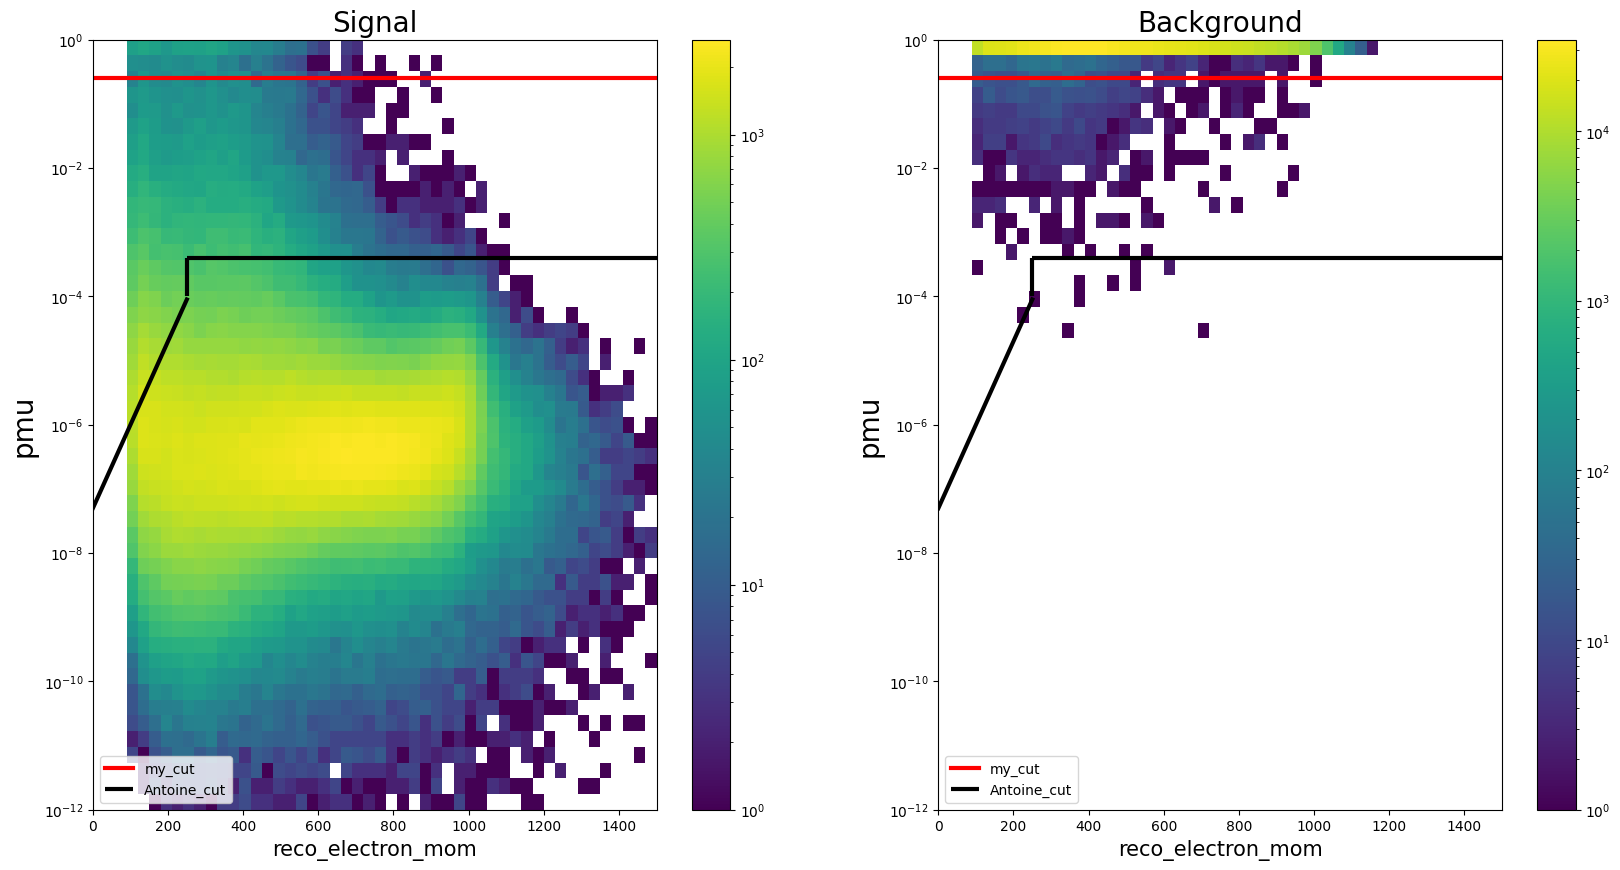

In [9]:
fig, axes = utils.plot_sg_bg(df_base, 1, 2, 'reco_electron_mom', 'pmu', [0, 1500], [1e-12,1], 50, 100, logbin_y = True)

# Applying the cuts: (Separating electron and muon)

x = np.linspace(0,1500, 1000)
y = 10**(0*x- 0.6)                                          # My cut

x_1 = np.linspace(0, 250, 100)
y_1 = 10**((x_1-100)/200*(6 + np.log10(0.0004)) + -6)        # Antoine's pre-defined cut

#optimizing the cut: (y = mx+b) # Here m should range between (-1,1) and b (-12, 0)
# m, b, accuracy = utils.optimum_cut_linear(df_base, 1, 2, 'reco_electron_mom', 'pmu', 0.002, -4, is_log = True, greater_than = False)
# print(m, b, accuracy)

print(utils.check_accuracy(df_base[((df_base["pmu"]<0.0004) & (df_base["reco_electron_mom"]>300)) | ((df_base["pmu"]< 10**((df_base["reco_electron_mom"]-100)/200*(6+np.log10(0.0004)) - 6)) & (df_base["reco_electron_mom"] <= 300))], 1, 2))
print(utils.check_accuracy(df_base[(df_base['pmu'] <  10**(-0.6))], 1, 2))

axes[0].plot(x,y, color = "red", linewidth =3 , label = 'my_cut')
axes[1].plot(x,y, color = "red", linewidth =3 , label = 'my_cut' )


axes[0].plot(x_1,y_1, color = "black", linewidth =3 )
axes[0].hlines(0.0004, 250, 2500, colors='black', linewidth=3, label='Antoine_cut')
axes[0].vlines(250, 0.0001, 0.0004, colors='black', linewidth=3)

axes[1].plot(x_1,y_1, color = "black", linewidth =3 )
axes[1].hlines(0.0004, 250, 2500, colors='black', linewidth=3, label='Antoine_cut')
axes[1].vlines(250, 0.0001, 0.0004, colors='black', linewidth=3)

axes[0].legend()
axes[1].legend()

plt.show()

In [10]:
df_pmu = df_base[(df_base['pmu'] <  10**(-0.6))]

**Softmax Electron/Muon Separation Cut:**

To distinguish between electrons and muons using softmax probabilities, the single cut applied is:

$ P(\mu) < 10^{-0.6} $

731.2293010113457
771.6558418670177


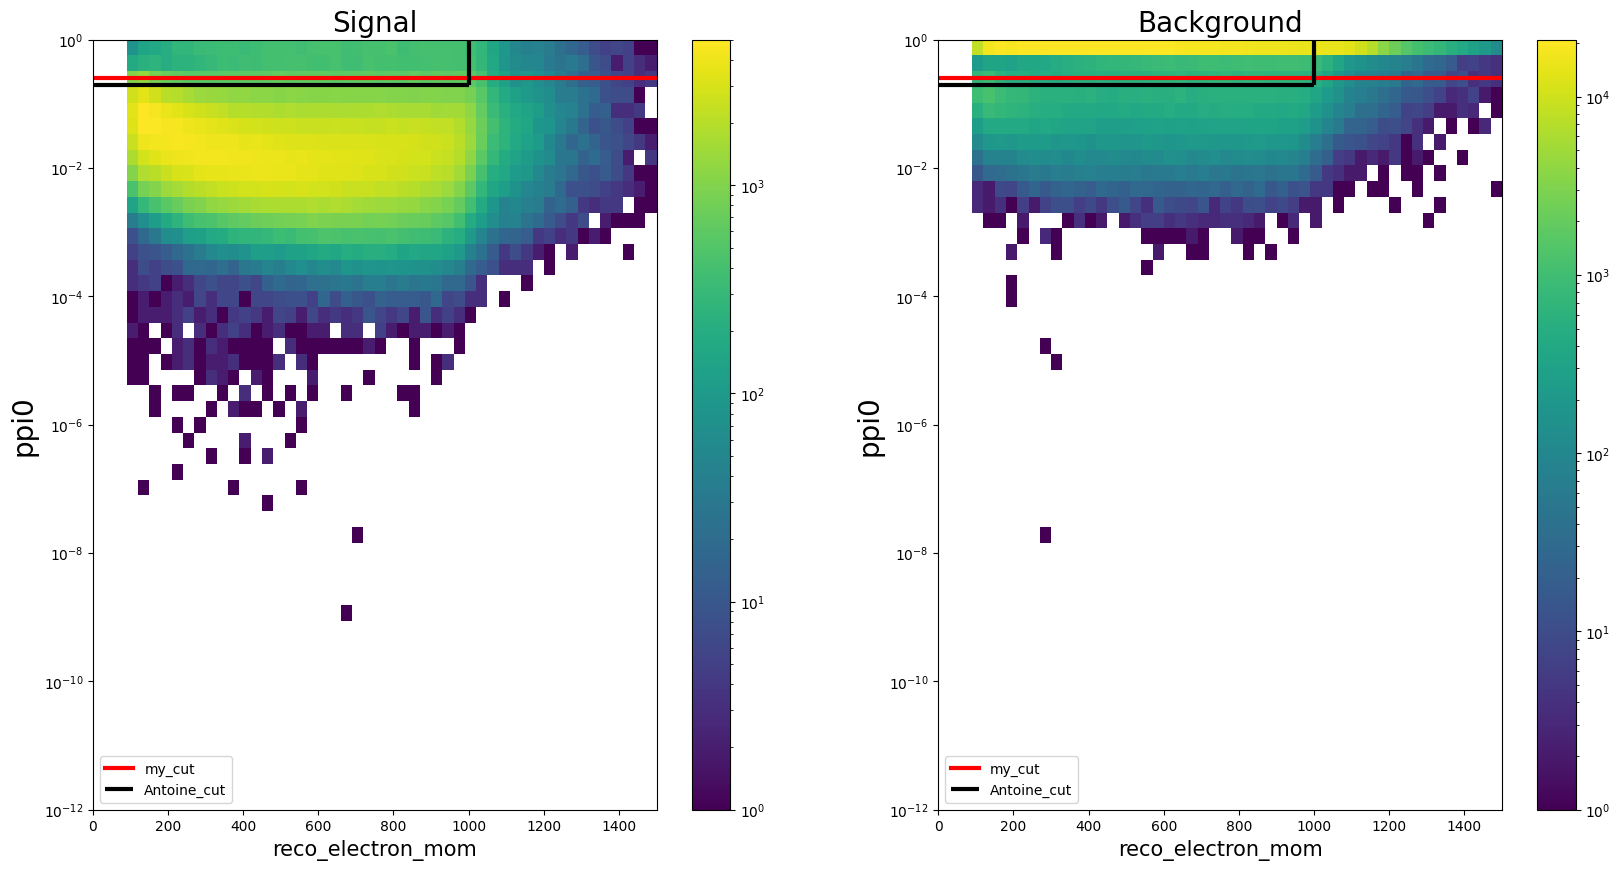

In [11]:
fig, axes = utils.plot_sg_bg(df_base, 1, 3, 'reco_electron_mom', 'ppi0', [0, 1500], [1e-12,1], 50, 100, logbin_y = True)

# Applying the cuts: (Separating electron and pi0)

x = np.linspace(0,1500, 1000)
y = 10**(0*x- 0.6)                                          # My cut


# (df_base["ppi0"]<0.5) & (df_base["reco_electron_mom"]<=1000)) | (df_base["reco_electron_mom"]>1000) 
# Antoine's pre-defined cut

#optimizing the cut: (y = mx+b) # Here m should range between (-1,1) and b (-12, 0)
# m, b, accuracy = utils.optimum_cut_linear(df_base, 1, 3, 'reco_electron_mom', 'ppi0', is_log = True, greater_than = False)
# print(m, b, accuracy)

print(utils.check_accuracy(df_base[((df_base["ppi0"]<0.5) & (df_base["reco_electron_mom"]<=1000)) | (df_base["reco_electron_mom"]>1000)], 1, 3))
print(utils.check_accuracy(df_base[(df_base['ppi0'] <  10**(-0.6))], 1, 3))

axes[0].plot(x,y, color = "red", linewidth =3 , label = 'my_cut')
axes[1].plot(x,y, color = "red", linewidth =3 , label = 'my_cut' )


axes[0].hlines(0.2, 0, 1000, colors='black', linewidth=3, label='Antoine_cut')
axes[0].vlines(1000, 0.2, 1, colors='black', linewidth=3)

axes[1].hlines(0.2, 0, 1000, colors='black', linewidth=3, label='Antoine_cut')
axes[1].vlines(1000, 0.2, 1, colors='black', linewidth=3)

axes[0].legend()
axes[1].legend()

plt.show()

In [12]:
df_ppi0 = df_base[(df_base['ppi0'] <  10**(-0.6))]

760.4365312520108
771.8595210774281


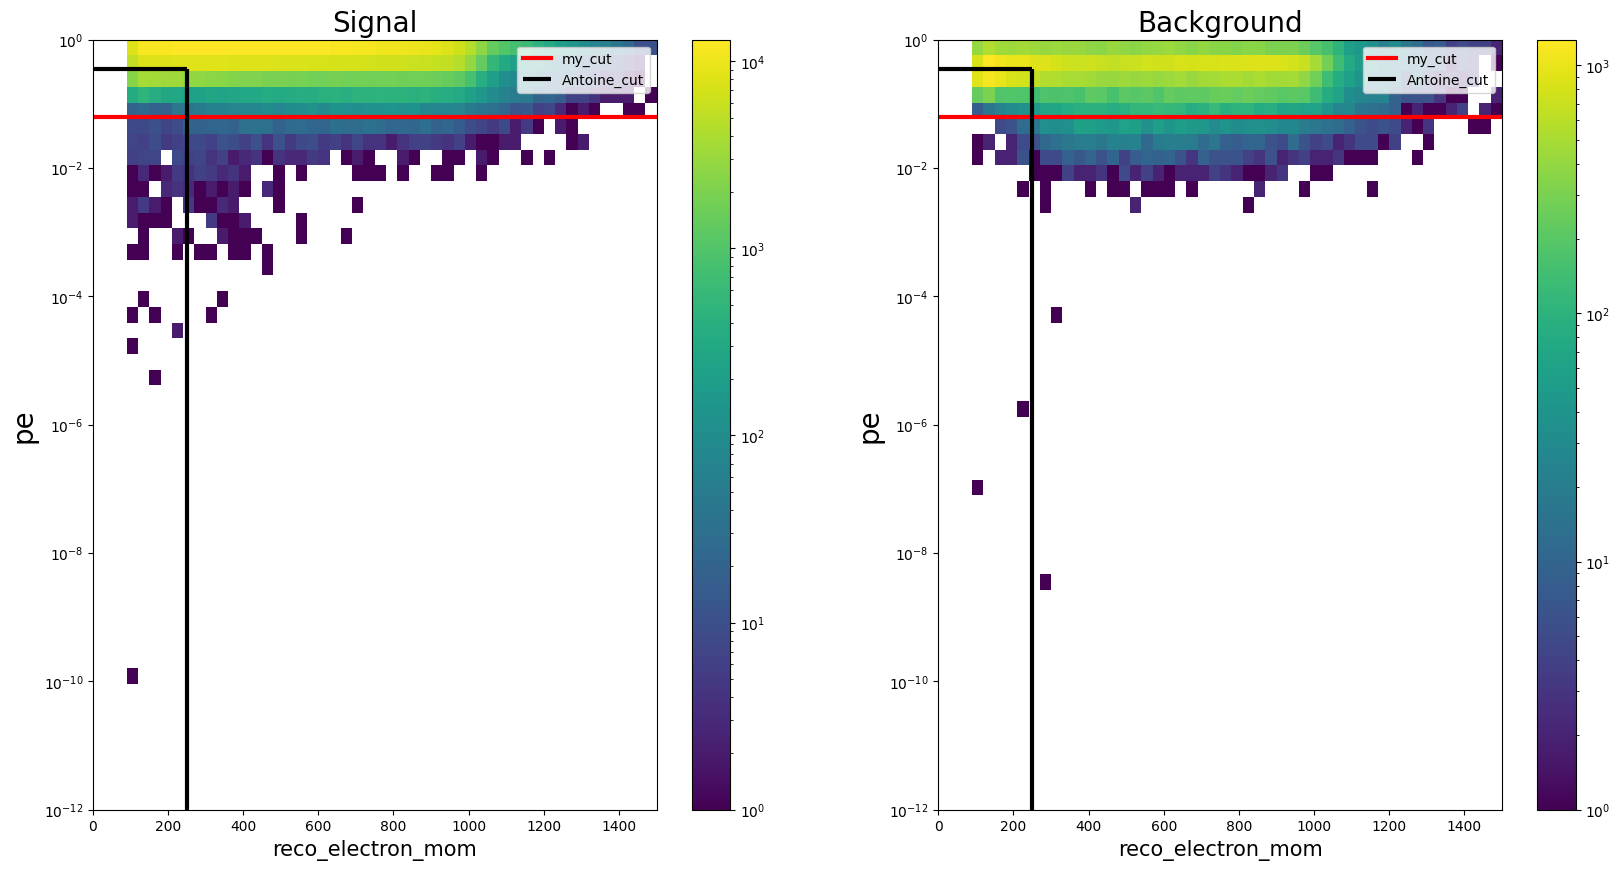

In [13]:
fig, axes = utils.plot_sg_bg(df_ppi0, 1, 3, 'reco_electron_mom', 'pe', [0, 1500], [1e-12,1], 50, 100, logbin_y = True)

# Applying the cuts: (Separating electron and pi0)

x = np.linspace(0,1500, 1000)
y = 10**(0*x- 1.2)                                          # My cut

#((df_ppi0["pe"]>0.35) & (df_ppi0["reco_electron_mom"]<250)) | (df_ppi0["reco_electron_mom"]>=250) 
# Antoine's pre-defined cut

#optimizing the cut: (y = mx+b) # Here m should range between (-1,1) and b (-12, 0)
# m, b, accuracy = utils.optimum_cut_linear(df_ppi0, 1, 3, 'reco_electron_mom', 'pe', is_log = True)
# print(m, b, accuracy)

print(utils.check_accuracy(df_ppi0[((df_ppi0["pe"]>0.35) & (df_ppi0["reco_electron_mom"]<250)) | (df_ppi0["reco_electron_mom"]>=250) ], 1, 3))
print(utils.check_accuracy(df_ppi0[(df_ppi0['pe'] > 10**(-1.2))], 1, 3))

axes[0].plot(x,y, color = "red", linewidth =3 , label = 'my_cut')
axes[1].plot(x,y, color = "red", linewidth =3 , label = 'my_cut' )


axes[0].hlines(0.35, 0, 250, colors='black', linewidth=3, label='Antoine_cut')
axes[0].vlines(250, 0, 0.35, colors='black', linewidth=3)

axes[1].hlines(0.35, 0, 250, colors='black', linewidth=3, label='Antoine_cut')
axes[1].vlines(250, 0, 0.35, colors='black', linewidth=3)

axes[0].legend()
axes[1].legend()

plt.show()

In [14]:
df_pe = df_ppi0[(df_ppi0['pe'] > 10**(-1.2))]

767.7941477470378
771.8595210774281


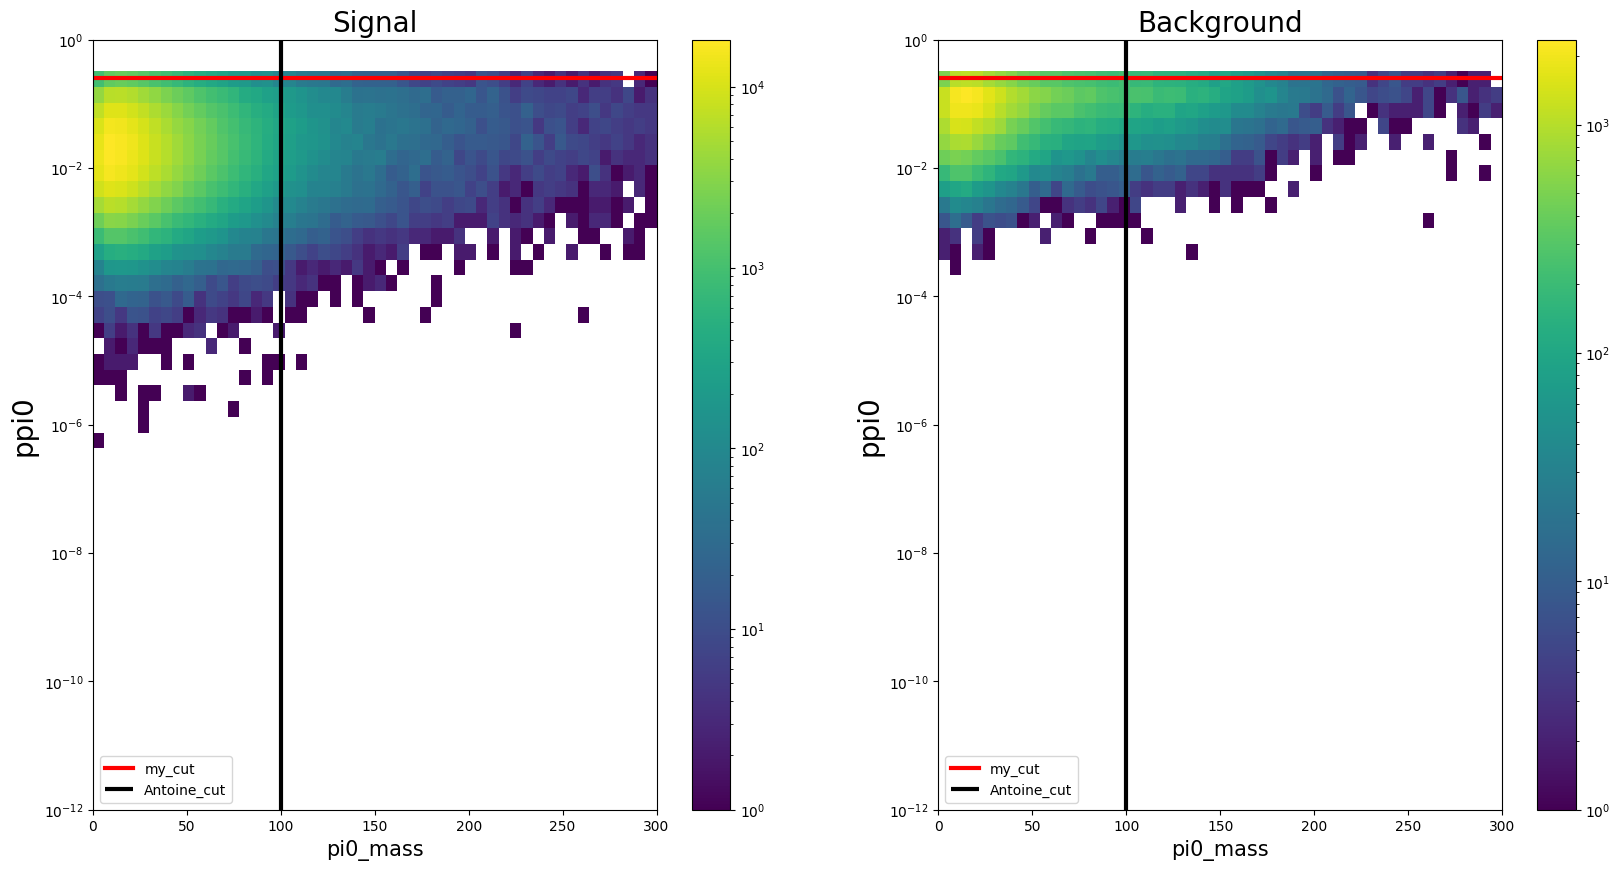

In [15]:
fig, axes = utils.plot_sg_bg(df_pe, 1, 3, 'pi0_mass', 'ppi0', [0, 300], [1e-12,1], 50, 100, logbin_y = True)

# Applying the cuts: (Separating electron and pi0)

x = np.linspace(0,300, 100)
y = 10**(0*x - 0.6)                                          # My cut

# df_pe["pi0_mass"]<100
# Antoine's pre-defined cut

#optimizing the cut: (y = mx+b) # Here m should range between (-1,1) and b (-12, 0)
# m, b, accuracy = utils.optimum_cut_linear(df_pe, 1, 3, 'pi0_mass', 'ppi0', is_log = True, greater_than = False)
# print(m, b, accuracy)

print(utils.check_accuracy(df_pe[df_pe["pi0_mass"]<100], 1, 3))
print(utils.check_accuracy(df_pe[(df_pe['ppi0'] < 10**(0*df_pe['pi0_mass']-0.6))], 1, 3))


axes[0].plot(x,y, color = "red", linewidth =3 , label = 'my_cut')
axes[1].plot(x,y, color = "red", linewidth =3 , label = 'my_cut' )


axes[0].vlines(100, 0, 1, colors='black', linewidth=3, label='Antoine_cut')

axes[1].vlines(100, 0, 1, colors='black', linewidth=3, label='Antoine_cut')

axes[0].legend()
axes[1].legend()

plt.show()

In [16]:
df_mass = df_pe[(df_pe['ppi0'] < 10**(-0.6))]

**Softmax Electron/pi0 Separation Cut:**

To distinguish between electrons and pi0 using softmax probabilities, the following cuts are applied:

1. $ P(\pi^{0}) < 10^{-0.6} $
2. $ P(e) > 10^{-1.2} $
3. $ p(\pi^{0}) < 10^{-0.6} $

The 3rd cut already is included in the 1st.

In [17]:
sig_eff_emu = utils.sg_eff(df_base, utils.return_ml_emu_cuts(df_base), sg_label = 1)
bg_rej_emu = utils.bg_rej(df_base, utils.return_ml_emu_cuts(df_base), bg_label = 2)
print(sig_eff_emu, bg_rej_emu)

sig_eff_epi0 = utils.sg_eff(df_base, utils.return_ml_epi0_cuts(df_base), sg_label = 1)
bg_rej_epi0 = utils.bg_rej(df_base, utils.return_ml_epi0_cuts(df_base), bg_label = 3)
print(sig_eff_epi0, bg_rej_epi0)

0.9971692230588126 0.9987872467572033
0.9536440243362316 0.9126017360058877


**Softmax Cut Analysis:**

After applying the FiTQun cuts, we observe the following signal and background event detection rates:

1. **e/mu Cuts:**
   - Approximately 99.7% of true signal events are correctly identified as signal.
   - 99.9% of background events are successfully rejected by the e/mu cuts.
   - However, around 0.1% of the background events are misclassified as signal.

2. **e/pi0 Cuts:**
   - About 95% of true signal events are correctly classified as signal.
   - 91% of background events are rejected by the e/pi0 cuts.
   - However, around 9% of the background events are misclassified as signal.


In [18]:
# Precison, recall, f1_score

utils.f1(df_base, utils.return_ml_emu_cuts(df_base), 1, 2)

(0.9987917153701685, 0.9971692230588126, 0.9979798097623817)

In [19]:
# Precison, recall, f1_score

utils.f1(df_base, utils.return_ml_epi0_cuts(df_base), 1, 3)

(0.9101711978286019, 0.9536440243362316, 0.931400616981798)